In [7]:
import joblib
model = joblib.load('brain_tumor_kMeans_module.sav')
tumorLabel=4.0

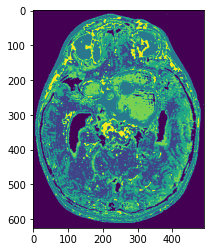

In [8]:
from cv2 import *
from matplotlib import pyplot as plt 
img= cv2.imread('Tumor_test/glioma_tumor/image(22).jpg',0)
img_original = cv2.imread('Tumor_test/glioma_tumor/image(22).jpg')
#img= cv2.imread(img_path,0)
height,width = img.shape
imgFlatten = img.reshape(height*width,1)
labels = model.predict(imgFlatten)
labels2D = labels.reshape(height, width)
mask = (labels2D==tumorLabel)
plt.imshow(labels2D)

In [9]:
from matplotlib import pyplot as plt
import numpy as np
tumorExtracted = np.bitwise_and(mask,img)

In [11]:
from cv2 import *
contours,hieararchy = cv2.findContours(tumorExtracted,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print('no. of contours: ', len(contours))
#cv2.drawContours(img_original,contours,-1,(0,255,255),2)
for index,cnt in enumerate(contours):
    area=cv2.contourArea(cnt)
    #print(area,index)
    
    font = cv2.FONT_HERSHEY_SIMPLEX 
    fontScale = 1 
    color = (255, 0, 0) 
    thickness = 2
    
    if(area>500):
        cv2.drawContours(img_original,[cnt],-1,(0,255,255),2)
        x,y,w,h = cv2.boundingRect(cnt)
        org = (x+5,y-5) 
        cv2.rectangle(img_original,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(img_original,(x,y),(x+120,y-40),(0,255,0),-1)
        #cv2.putText(img_original,"TUMOR",(x+10,y-10),cv2.FONT_HERSEY_SIMPLEX,1,(255,255,255),2)
        cv2.putText(img_original, 'TUMOR', org, font, fontScale, color, thickness, cv2.LINE_AA)
    
        
cv2.imshow('LIVE',img_original)
cv2.waitKey(0)
#cv2.destroyAllWindow()

no. of contours:  3218


-1